In [1]:
import pandas as pd
import featuretools as ft
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [4]:
output=pd.read_csv("test_t02dQwI.csv")
input=pd.read_csv('train_kOBLwZA.csv')
input['Item_Weight']='red'
output['Item_Weight']='white'
input['Outlet_Size']=input['Item_Weight'].apply(lambda x: 'NaN'
                                             if x[1:5] else 'small'
                                                 if x <= 7 else 'medium')
input['Outlet_Size']=pd.Categorical(input['Outlet_Size'],categories=['NaN','small','medium'])
output['Outlet_Size']=output['Item_Weight'].apply(lambda x: 'NaN'
                                             if x[1:5] else 'small'
                                                 if x <= 7 else 'medium')
output['Outlet_Size']=pd.Categorical(output['Outlet_Size'],categories=['NaN','small','medium'])

In [5]:
input_output=pd.concat([input,output],sort=True)
input_output=input_output.sample(frac=1,random_state=42).reset_index(drop=True)
input_output.head()


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Regular,FDT51,111.4544,NaN,Meat,0.010866,white,1985,OUT027,Tier 3,NaN,Supermarket Type3
1,Low Fat,FDB27,196.8768,1182.4608,Dairy,0.055476,red,1999,OUT049,Tier 1,NaN,Supermarket Type1
2,Low Fat,NCB07,197.0110,NaN,Household,0.077493,white,2004,OUT035,Tier 2,NaN,Supermarket Type1
3,Regular,FDY39,182.0608,7717.9536,Meat,0.000000,red,1985,OUT027,Tier 3,NaN,Supermarket Type3
4,Regular,DRA59,184.3924,NaN,Soft Drinks,0.128187,white,2002,OUT045,Tier 2,NaN,Supermarket Type1


In [6]:
subset_attributes=['Item_Fat_Content','Item_Identifier','Item_MRP','Item_Type','Item_Visibility','Item_Weight','Outlet_Establishment_Year','Outlet_Identifier','Outlet_Location_Type','Outlet_Size','Outlet_Type']

In [7]:
op=round(output[subset_attributes].describe(),2)

In [8]:
ip=round(input[subset_attributes].describe(),2)

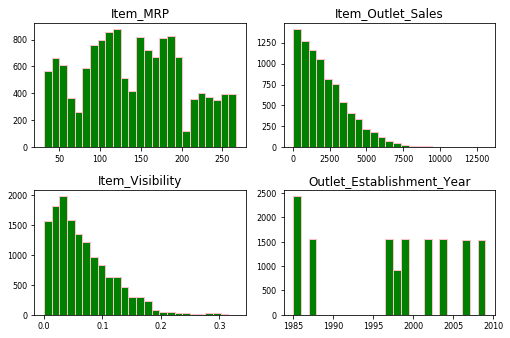

In [9]:
input_output.hist(bins=25,color='green',edgecolor='pink',linewidth=1.0,xlabelsize=8,ylabelsize=8,grid=False)
plt.tight_layout(rect=(0,0,1.2,1.2))
#this isnt 2D it's univariate visual analysis

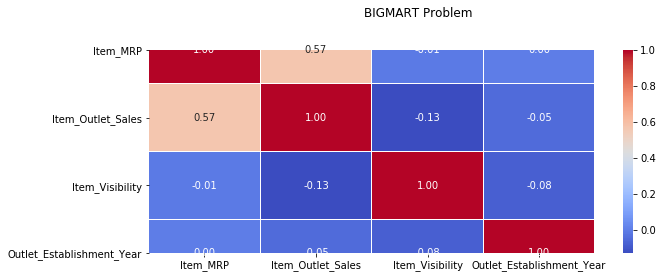

In [10]:
#here i opt for correlation matrix heatmap visual analysis
f,ax=plt.subplots(figsize=(10,4))
corr=input_output.corr()
hm=sns.heatmap(round(corr,2),annot=True,ax=ax,cmap='coolwarm',linewidths=.05,fmt='.2f')
f.subplots_adjust(top=0.83)
t=f.suptitle('BIGMART Problem',fontsize=12)

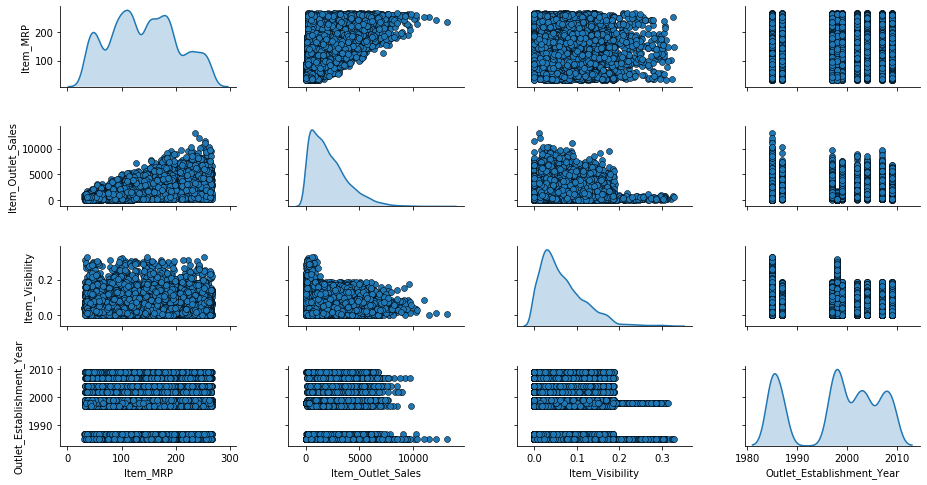

In [25]:
#i now visualize using Pair-Wise scatter plots...@billy_gareth
cols=['Item_MRP','Item_Outlet_Sales','Item_Visibility','Outlet_Establishment_Year']
pp=sns.pairplot(input_output[cols],height=1.8,aspect=1.8,
               plot_kws=dict(edgecolor='k',linewidth=.5),
               diag_kind='kde',diag_kws=dict(shade=True))
fig=pp.fig
fig.subplots_adjust(top=0.93,wspace=.3)
t=f.suptitle('Bigmart Problem',fontsize=12)

In [12]:
subset_df=input_output[cols]

In [13]:
ss=StandardScaler()

In [14]:
scaled_df=ss.fit_transform(subset_df)

In [15]:
scaled_df=pd.DataFrame(subset_df,columns=cols)

In [16]:
final_df=pd.concat([scaled_df,input_output['Item_Weight']],axis=1)

In [17]:
final_df.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Outlet_Establishment_Year,Item_Weight
0,111.4544,NaN,0.010866,1985,white
1,196.8768,1182.4608,0.055476,1999,red
2,197.0110,NaN,0.077493,2004,white
3,182.0608,7717.9536,0.000000,1985,red
4,184.3924,NaN,0.128187,2002,white


In [18]:
#i now plot the parallel coordinates
from pandas.plotting import parallel_coordinates

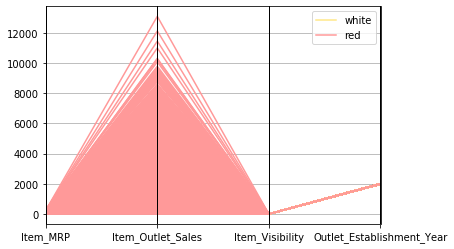

In [19]:
pc=parallel_coordinates(final_df,'Item_Weight',color=('#FFE888','#FF9999'))

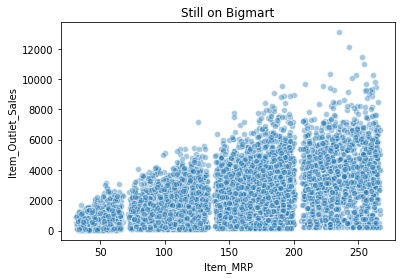

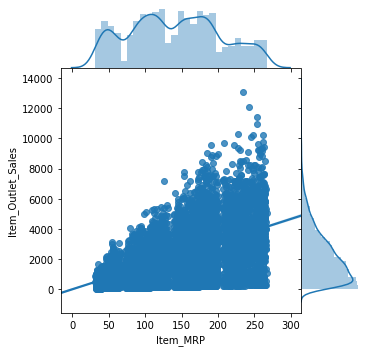

In [23]:
#i'll now use scatter plots and joint plots for the same
plt.scatter(input_output['Item_MRP'],input_output['Item_Outlet_Sales'],
           alpha =0.4,edgecolors='w')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.title('Still on Bigmart',y=1)

bg=sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',data=input_output,kind='reg',space=0,size=5,ratio=4)